In [1]:
# DATA MINING AND MACHINE LEARNING PROJECT 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

#Load Dataset
df = pd.read_csv('telescope_data.csv')
df = df[['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist']]
print(df.head())
print("\n Covariance matrix by using pandas =\n",df.cov())
A=pd.DataFrame.to_numpy(df)

# calculate the multivariate mean
mu=np.mean(A,axis=0)
print("\n The multivariate mean of A: \n")
print(mu)
print('\n')

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  
0  40.0920   81.8828  
1   6.3609  205.2610  
2  76.9600  256.7880  
3  10.4490  116.7370  
4   4.6480  356.4620  

 Covariance matrix by using pandas =
               fLength      fWidth      fSize     fConc    fConc1        fAsym  \
fLength   1766.710603  731.278208  13.877761 -4.795976 -2.754310  -338.521963   
fWidth     731.278208  511.310810   7.031488 -2.230835 -1.292486   254.802711   
fSize       13.877761    7.031488   0.226271 -0.067494 -0.038788     0.460739   
fConc       -4.795976   -2.230

In [3]:
# centered the data
centered_A = A-mu

# covariance matrix by inner product
cov1=np.dot(centered_A.T,centered_A)/(centered_A.shape[0] - 1)
print("Display covariance of inner product between the columns of the centered data matrix values: \n")
print(cov1)
print('\n')

Display covariance of inner product between the columns of the centered data matrix values: 

[[ 1.76671060e+03  7.31278208e+02  1.38777613e+01 -4.79597589e+00
  -2.75430985e+00 -3.38521963e+02 -3.17091670e+02  1.34197204e+02
  -4.26995152e+01  1.08850674e+03]
 [ 7.31278208e+02  5.11310810e+02  7.03148837e+00 -2.23083506e+00
  -1.29248588e+00  2.54802711e+02 -4.19194118e+02  7.64208425e+01
   3.46720258e+01  4.56444068e+02]
 [ 1.38777613e+01  7.03148837e+00  2.26271192e-01 -6.74936308e-02
  -3.87883133e-02  4.60739147e-01  1.60894156e+00  6.48693246e-01
  -2.84638820e+00  1.74006840e+01]
 [-4.79597589e+00 -2.23083506e+00 -6.74936308e-02  2.94825044e-02
   1.78747973e-02  3.29189889e-01 -8.84361090e-01 -3.93915412e-01
   1.31979942e+00 -4.61574466e+00]
 [-2.75430985e+00 -1.29248588e+00 -3.87883133e-02  1.78747973e-02
   1.14612948e-02  1.54446386e-01 -6.05826971e-01 -2.09961420e-01
   7.10752532e-01 -2.52378666e+00]
 [-3.38521963e+02  2.54802711e+02  4.60739147e-01  3.29189889e-01
   1.

In [4]:
# covariance matrix by outer product.
cov2=np.zeros((centered_A.shape[1],centered_A.shape[1]))

# implementing for loop to find the covariance matrix by outer product by row variable.

for row in centered_A:
    cov2 = cov2 + np.outer(row,row)
cov2=cov2/(centered_A.shape[0]-1)

print("\n covariance of Outer product values: \n")
print(cov2)


 covariance of Outer product values: 

[[ 1.76671060e+03  7.31278208e+02  1.38777613e+01 -4.79597589e+00
  -2.75430985e+00 -3.38521963e+02 -3.17091670e+02  1.34197204e+02
  -4.26995152e+01  1.08850674e+03]
 [ 7.31278208e+02  5.11310810e+02  7.03148837e+00 -2.23083506e+00
  -1.29248588e+00  2.54802711e+02 -4.19194118e+02  7.64208425e+01
   3.46720258e+01  4.56444068e+02]
 [ 1.38777613e+01  7.03148837e+00  2.26271192e-01 -6.74936308e-02
  -3.87883133e-02  4.60739147e-01  1.60894156e+00  6.48693246e-01
  -2.84638820e+00  1.74006840e+01]
 [-4.79597589e+00 -2.23083506e+00 -6.74936308e-02  2.94825044e-02
   1.78747973e-02  3.29189889e-01 -8.84361090e-01 -3.93915412e-01
   1.31979942e+00 -4.61574466e+00]
 [-2.75430985e+00 -1.29248588e+00 -3.87883133e-02  1.78747973e-02
   1.14612948e-02  1.54446386e-01 -6.05826971e-01 -2.09961420e-01
   7.10752532e-01 -2.52378666e+00]
 [-3.38521963e+02  2.54802711e+02  4.60739147e-01  3.29189889e-01
   1.54446386e-01  3.89983867e+03 -2.63597250e+02  1.549638

Cosine Similarity (Correlation) between Attributes 1 and 2: 0.7694093096665069


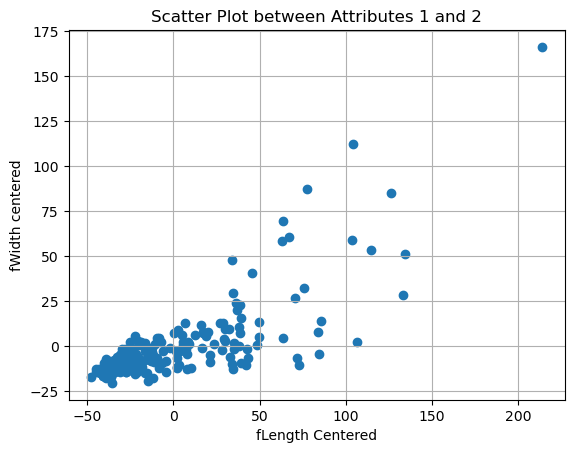

In [5]:
# To compute the correlation between Attributes 1 and 2, we need to first center the two vectors. 
# This means subtracting the mean of each vector from each of its elements. Once the vectors are centered, 
# we can compute the correlation between them
# Extract Attributes 1 and 2

# Center the attribute vectors
centered_attribute1 = df['fLength'] - df['fLength'].mean()
centered_attribute2 = df['fWidth'] - df['fWidth'].mean()

# Compute the cosine similarity (correlation) between the centered vectors
dot_product = np.dot(centered_attribute1, centered_attribute2)
a = np.linalg.norm(centered_attribute1)
b = np.linalg.norm(centered_attribute2)

cosine_similarity = dot_product / (a * b)

print("Cosine Similarity (Correlation) between Attributes 1 and 2:", cosine_similarity)

# Plot the scatter plot
plt.scatter(centered_attribute1, centered_attribute2)
plt.xlabel('fLength Centered')
plt.ylabel('fWidth centered')
plt.title('Scatter Plot between Attributes 1 and 2')
plt.grid()
plt.show()

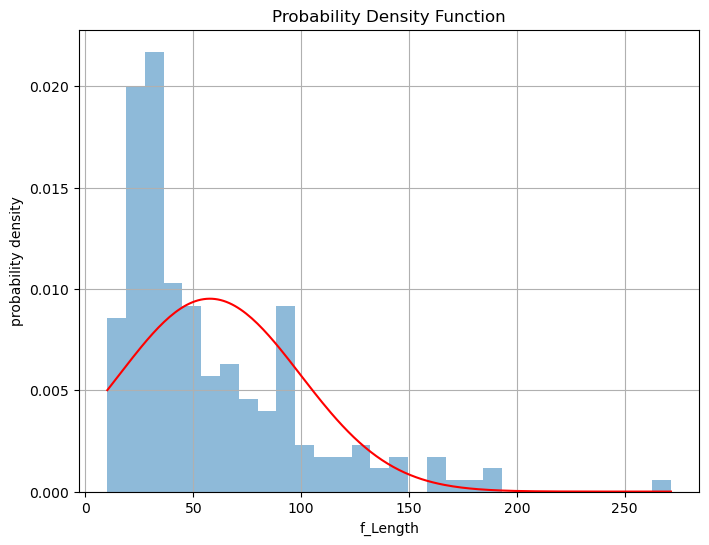

In [6]:
# Probability density function

f_Length = df['fLength']

# defining an array A. 
# it is a NumPy array of 200 evenly spaced numbers between the minimum and maximum values of the f_Length attribute.

A = np.linspace(min(f_Length), max(f_Length),200)

# finding mean of fLength

m = np.mean(f_Length)

# finding Standard Deviation of fLength

standard_deviation = np.std(f_Length)

# defines an array B of the Gaussian probability density function evaluated at each value in the array A.
# By using mean, standard deviation, numpy constatnt as np.pi and numpy exponnent np.exp().

B = (1/(standard_deviation*np.sqrt(2*np.pi))) * np.exp(-0.5 *((A-m)/standard_deviation)**2)


# plotting its probability density function.

# assigning width and height of the graph as 8,6 respectively.

plt.figure(figsize=(8,6))

# plotting histogram data of flength with 30 bins and 50% of transparent.

plt.hist(f_Length,density=True,bins=30,alpha=0.5)

# plotting A versus B in color red.

plt.plot(A,B, color='red')

# x-axis as f_Length.

plt.xlabel('f_Length')

# y-axis as Gaussian probability density function.

plt.ylabel('probability density')

# TITTLE as probability density function.
plt.title('Probability Density Function')

plt.grid()

plt.show()

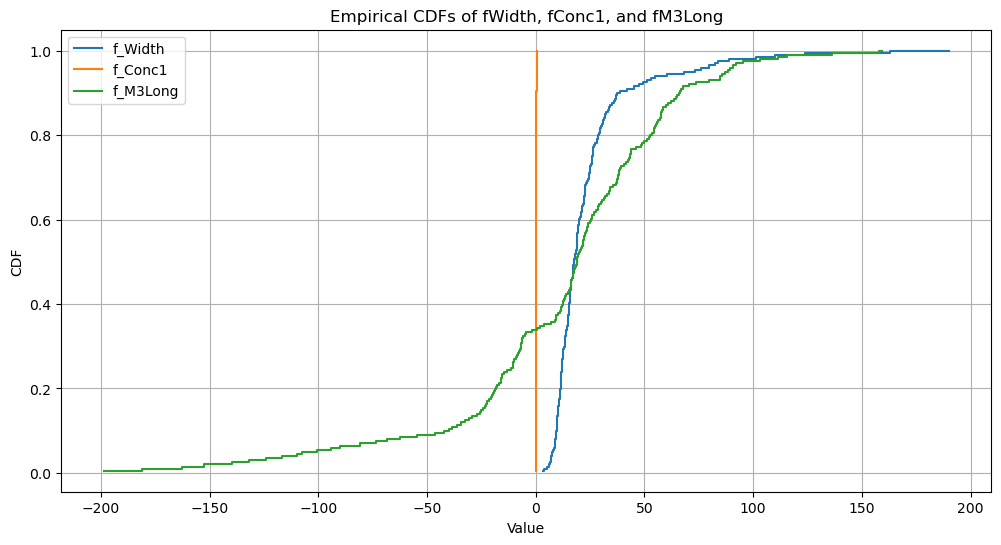

In [7]:

# Extract the three columns
f_Width = df['fWidth']
f_Conc1 = df['fConc1']
f_M3Long = df['fM3Long']

# Calculate the CDFs for each column
def calculate_cdf(variable):
    unique_values, counts = np.unique(variable, return_counts=True)
    cmf = np.cumsum(counts) / len(variable)
    return unique_values, cmf

unique_lengths_fWidth, cmf_fWidth = calculate_cdf(f_Width)
unique_lengths_fConc1, cmf_fConc1 = calculate_cdf(f_Conc1)
unique_lengths_fM3Long, cmf_fM3Long = calculate_cdf(f_M3Long)

# Create a single figure to display all three CDFs
plt.figure(figsize=(12, 6))

# Plot the CDF for fWidth
plt.step(unique_lengths_fWidth, cmf_fWidth, label='f_Width', where='mid')

# Plot the CDF for fConc1
plt.step(unique_lengths_fConc1, cmf_fConc1, label='f_Conc1', where='mid')

# Plot the CDF for fM3Long
plt.step(unique_lengths_fM3Long, cmf_fM3Long, label='f_M3Long', where='mid')

plt.xlabel('Value')
plt.ylabel('CDF')
plt.title('Empirical CDFs of fWidth, fConc1, and fM3Long')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# find the variances of the df
variances = np.var(df, axis=0)

# find the maximum and minimum values from variances.

max_variance_values= np.max(variances)
min_variance_values= np.min(variances)

# it is to find the indices of the maximum and minimum values.
max_variance_index = np.argmax(variances)
min_variance_index = np.argmin(variances)

print(f"Attribute {df.columns[max_variance_index]} has the largest variance:  {max_variance_values}")
print(f"Attribute {df.columns[min_variance_index]} has the smallest variance: {min_variance_values}")

Attribute fDist has the largest variance:  6329.8184983341225
Attribute fConc1 has the smallest variance: 0.011404273398678248


In [9]:
# finding covariance of df

L=df.cov()
print("\ncovariance of df:\n")
print(L)

# updating the diagonal values as zero to not involve in finding the pairs

np.fill_diagonal(L.values,0)

# Find the indices of the maximum and minimum covariance values

max_cov_index = np.unravel_index(np.argmax(L.values), L.shape)
min_cov_index = np.unravel_index(np.argmin(L.values), L.shape)

# Get the corresponding row and column names (indices)
row_index_max, col_index_max = L.index[max_cov_index[0]], L.columns[max_cov_index[1]]
row_index_min, col_index_min = L.index[min_cov_index[0]], L.columns[min_cov_index[1]]

print("\nMaximum Covariance:\n")
print(f"Index 1: {row_index_max}, Index 2: {col_index_max}, Value: {L.values[max_cov_index]}")

print("\nMinimum Covariance:\n")
print(f"Index 1: {row_index_min}, Index 2: {col_index_min}, Value: {L.values[min_cov_index]}")


covariance of df:

              fLength      fWidth      fSize     fConc    fConc1        fAsym  \
fLength   1766.710603  731.278208  13.877761 -4.795976 -2.754310  -338.521963   
fWidth     731.278208  511.310810   7.031488 -2.230835 -1.292486   254.802711   
fSize       13.877761    7.031488   0.226271 -0.067494 -0.038788     0.460739   
fConc       -4.795976   -2.230835  -0.067494  0.029483  0.017875     0.329190   
fConc1      -2.754310   -1.292486  -0.038788  0.017875  0.011461     0.154446   
fAsym     -338.521963  254.802711   0.460739  0.329190  0.154446  3899.838668   
fM3Long   -317.091670 -419.194118   1.608942 -0.884361 -0.605827  -263.597250   
fM3Trans   134.197204   76.420843   0.648693 -0.393915 -0.209961    15.496390   
fAlpha     -42.699515   34.672026  -2.846388  1.319799  0.710753    10.170821   
fDist     1088.506735  456.444068  17.400684 -4.615745 -2.523787  -659.973549   

              fM3Long    fM3Trans      fAlpha        fDist  
fLength   -317.091670  134.

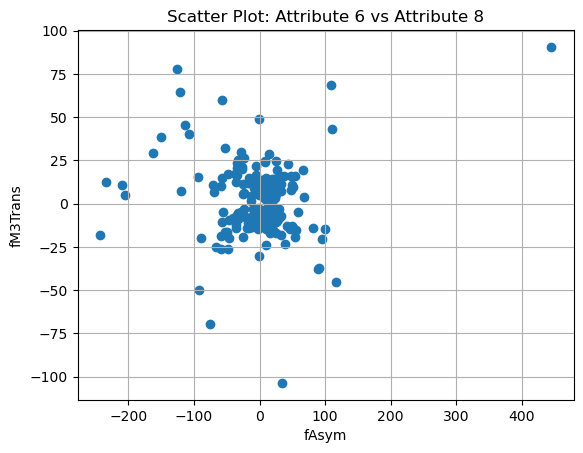

In [10]:
# Get the attribute names
attribute_6 = df.columns[5]
attribute_8 = df.columns[7]

# Plot the scatter plot
plt.scatter(df[attribute_6], df[attribute_8])
plt.grid()
plt.xlabel(attribute_6)
plt.ylabel(attribute_8)
plt.title("Scatter Plot: Attribute 6 vs Attribute 8")
plt.show()
